#### Join the data from Part 1 with the data from Part 2 to create a new dataframe.

Joined both API's together into one since some may contain restaurants that are not in the other.

In [147]:
import pandas as pd

bike_stations = pd.read_csv('bike_stations.csv')
yelp_restaurants = pd.read_csv('yelp_restaurants.csv')
foursquare_restaurants = pd.read_csv('foursquare_restaurants.csv')

restaurants = pd.concat([yelp_restaurants, foursquare_restaurants]) # adding different API data together
bike_and_restaurants = pd.merge(bike_stations, restaurants, on='station_name') # joining with bike stations

bike_and_restaurants.head()

,latitude,longitude,number_of_bikes,station_name,restaurant_name,categories,address,review_count,rating,distance
0,43.3216,11.327948,16,Curtatone,La Taverna di San Giuseppe,Tuscan,Via Giovanni Dupre 132,169.0,4.8,745.395007
1,43.3216,11.327948,16,Curtatone,Zest,"Italian, Wine Bars",Costa di Sant'antonio 13,26.0,4.7,177.848119
2,43.3216,11.327948,16,Curtatone,Compagnia dei Vinattieri,Tuscan,"Via delle Terme, 79",24.0,4.3,231.846606
3,43.3216,11.327948,16,Curtatone,La Chiacchiera,Italian,Via Costa di San Antonio 4,23.0,4.3,181.200690
4,43.3216,11.327948,16,Curtatone,Café Nannini,Cafes,Piazza Matteotti 32,14.0,4.4,60.451222


In [148]:
bike_and_restaurants.to_csv('bike_and_restaurants.csv', index=False)

#### Look at the data before and after the join to validate your data.



##### Data before join

In [149]:
print(bike_stations.head())
print(yelp_restaurants.head())
print(foursquare_restaurants.head())

    latitude  longitude  number_of_bikes station_name
0  43.321600  11.327948               16    Curtatone
1  43.314554  11.331021               10  S. Agostino
2  43.316539  11.337212                7  S. Girolamo
3  43.320523  11.323225               10     Fortezza
4  43.328983  11.321913               10    Antiporto
              restaurant_name          categories                     address  \
0  La Taverna di San Giuseppe              Tuscan      Via Giovanni Dupre 132   
1                        Zest  Italian, Wine Bars    Costa di Sant'antonio 13   
2    Compagnia dei Vinattieri              Tuscan         Via delle Terme, 79   
3              La Chiacchiera             Italian  Via Costa di San Antonio 4   
4                Café Nannini               Cafes         Piazza Matteotti 32   

   review_count  rating station_name    distance  
0           169     4.8    Curtatone  745.395007  
1            26     4.7    Curtatone  177.848119  
2            24     4.3    Curtatone

##### Data after join:

In [150]:
bike_and_restaurants.head()

,latitude,longitude,number_of_bikes,station_name,restaurant_name,categories,address,review_count,rating,distance
0,43.3216,11.327948,16,Curtatone,La Taverna di San Giuseppe,Tuscan,Via Giovanni Dupre 132,169.0,4.8,745.395007
1,43.3216,11.327948,16,Curtatone,Zest,"Italian, Wine Bars",Costa di Sant'antonio 13,26.0,4.7,177.848119
2,43.3216,11.327948,16,Curtatone,Compagnia dei Vinattieri,Tuscan,"Via delle Terme, 79",24.0,4.3,231.846606
3,43.3216,11.327948,16,Curtatone,La Chiacchiera,Italian,Via Costa di San Antonio 4,23.0,4.3,181.200690
4,43.3216,11.327948,16,Curtatone,Café Nannini,Cafes,Piazza Matteotti 32,14.0,4.4,60.451222


##### Checking that length and shape of joined data matches with the way the data was joined

In [173]:
print(f'Bike_and_Restaurants Shape: {bike_and_restaurants.shape}')
print(f'Yelp_Restaurants Shape: {yelp_restaurants.shape}')
print(f'Foursquare_Restaurants Shape: {foursquare_restaurants.shape}')
print(f'Bike_Stations Shape: {bike_stations.shape}')

Bike_and_Restaurants Shape: (375, 10)
Yelp_Restaurants Shape: (214, 7)
Foursquare_Restaurants Shape: (161, 5)
Bike_Stations Shape: (19, 4)


In [178]:
print(f'Expected Amount of Rows: {len(yelp_restaurants) + len(foursquare_restaurants)}')
print(f'Amount of Rows from join: {len(bike_and_restaurants)}')

Expected Amount of Rows: 375
Amount of Rows from join: 375


In [187]:
print(f'Amount of Columns: {len(bike_and_restaurants.columns)}')

# Add columns. Remove one from join
print(f'Expected Amount of Columns: {len(bike_stations.columns) + len(restaurants.columns) - 1}')

Amount of Columns: 10
Expected Amount of Columns: 10


##### Checking for Nulls

In [153]:
bike_and_restaurants.isnull().sum()

latitude             0
longitude            0
number_of_bikes      0
station_name         0
restaurant_name      0
categories           1
address              0
review_count       161
rating             161
distance             0
dtype: int64

It is possible to validate the join using the length of the dataframe from before and after. Because of the way the data is joined together, by the resturants sharing columns, the combined amount of rows of the two api resturants should be the same amount of rows as the final dataframe. This is shown to be correct.

The joined dataframe should also have the same amount of columns as the resturant API's combined and the bike stations, ignoring one since they will be sharing a column. Since both the columns from the joined and before match, it indicates that the join was done correctly.

The number of nulls in both the review_count and rating is to be expected since one of the API's did not have any data on reviews or rating. The one null in the category is most likely an error and can be cleaned as it shouldn't affect the join. The lack of nulls in the other columns is another indicator that the join was done correctly.

#### Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

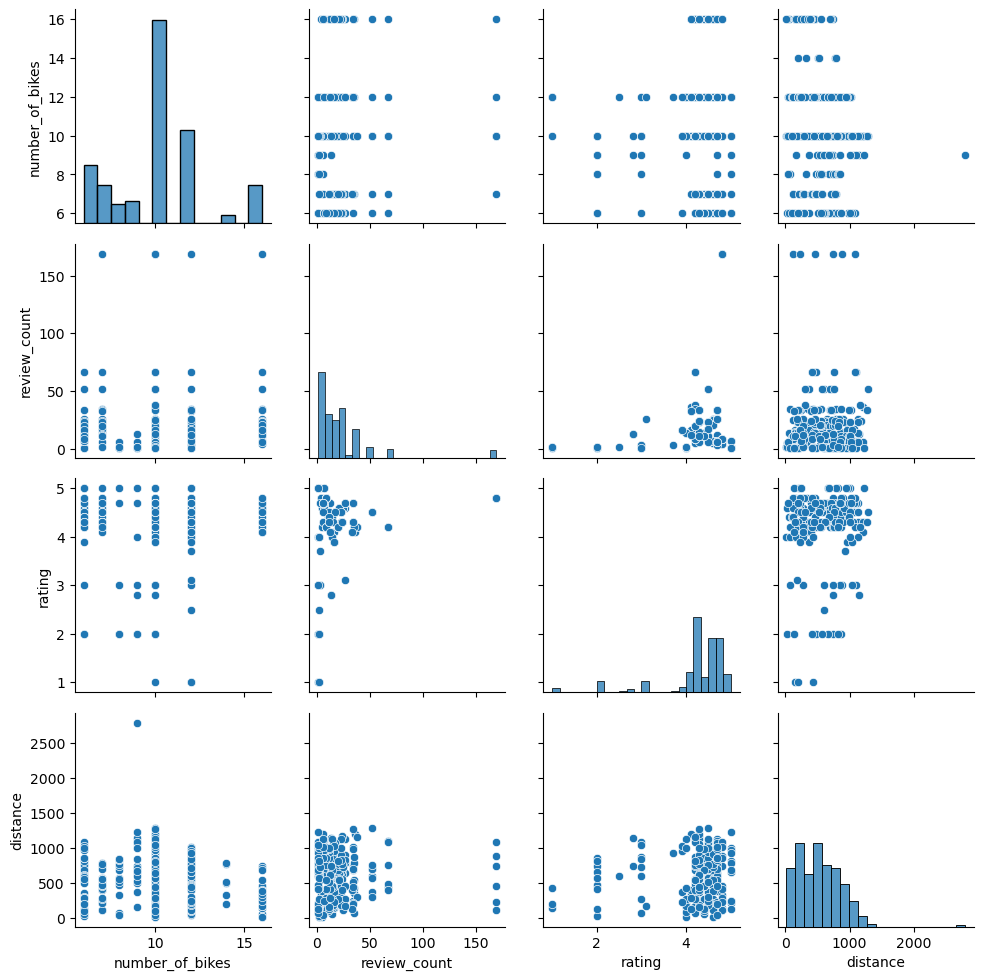

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
 
g = sns.PairGrid(bike_and_restaurants.iloc[:, 2:])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

plt.savefig("scatter_and_hist.jpg")

Looking through the scatterplots, the only graph showing a low correlation is between the rating and review_count graph. The rest tend to be scattered and spread around indicating no correlation. Although because this data is not yet cleaned and of the way the data was joined it most likely contains multiple duplicates that may impact the current analysis.

The histograms also seem to point out outliers in both the review_count column and the rating column. This will also be tested using a boxplot.

##### Checking for Outliers

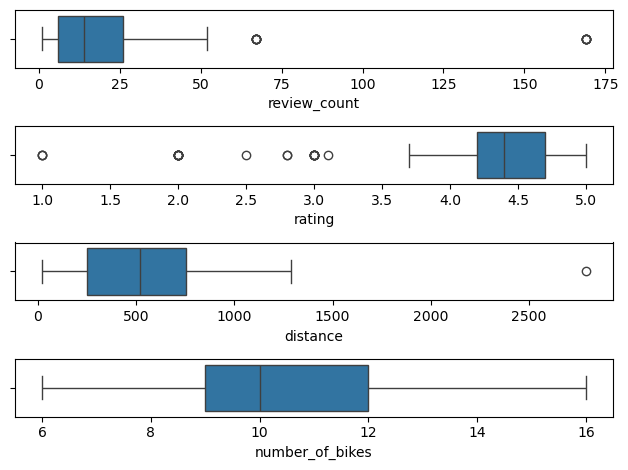

In [88]:
fig, ax = plt.subplots(4)
sns.boxplot(ax=ax[0], x=(bike_and_restaurants['review_count']))
sns.boxplot(ax=ax[1], x=(bike_and_restaurants['rating']))
sns.boxplot(ax=ax[2], x=(bike_and_restaurants['distance']))
sns.boxplot(ax=ax[3], x=(bike_and_restaurants['number_of_bikes']))

plt.tight_layout()

plt.savefig("boxplots.jpg")
plt.show()

Despite having multiple outliers in different columns, it is best to keep all the outliers. These outliers are most likely extreme values rather than abnormalities or errors. Also due to the low amount of data (only 19 stations), each data point is important. Because of this, it is best to include them to be able to show the entire span of data.

# Database

#### Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

##### Creating Database and Tables

In [135]:
import sqlite3 as sqlite
from sqlalchemy import create_engine

In [136]:
connection = sqlite.connect("bike_and_restaurants.db")


create_nearby_restaurants_table = """ CREATE TABLE IF NOT EXISTS nearby_restaurants(
                                             station_name TEXT,
                                             restaurant_name TEXT,
                                             distance FLOAT,
                                             PRIMARY KEY (station_name, restaurant_name)
                                             )
                                  """

create_bike_stations_table = """ CREATE TABLE IF NOT EXISTS bike_stations(
                                     station_name TEXT PRIMARY KEY,
                                     number_of_bikes INTEGER,
                                     latitude TEXT,
                                     longitude TEXT,
                                     FOREIGN KEY (station_name) REFERENCES nearby_restaurants(station_name) 
                                     )
                             """

create_restaurants_table = """ CREATE TABLE IF NOT EXISTS restaurants(
                                   restaurant_name TEXT PRIMARY KEY,
                                   categories TEXT,
                                   address TEXT,
                                   review_count FLOAT,
                                   rating FLOAT,
                                   FOREIGN KEY (restaurant_name) REFERENCES nearby_restaurants(restaurant_name)
                                   )
                           """


cursor = connection.cursor()
cursor.execute(create_nearby_restaurants_table)
cursor.execute(create_bike_stations_table)
cursor.execute(create_restaurants_table)

##### Cleaning Data

In [137]:
def clean_strings(columns): # capitalizing first letter and removing leading and trailing spaces
    for column in columns:
        bike_and_restaurants[column] = bike_and_restaurants[column].str.capitalize()
        bike_and_restaurants[column] = bike_and_restaurants[column].str.strip()

clean_strings(['restaurant_name', 'station_name', 'categories', 'address'])
bike_and_restaurants = bike_and_restaurants[bike_and_restaurants['distance'] < 1000] # distance within 100m

In [138]:
# cleaning and moving data for nearby_resturants table

nearby_restaurants = bike_and_restaurants[['station_name', 'restaurant_name', 'distance']]
nearby_restaurants = nearby_restaurants.drop_duplicates(subset=['station_name', 'restaurant_name'])

nearby_restaurants.head()

,station_name,restaurant_name,distance
0,Curtatone,La taverna di san giuseppe,745.395007
1,Curtatone,Zest,177.848119
2,Curtatone,Compagnia dei vinattieri,231.846606
3,Curtatone,La chiacchiera,181.200690
4,Curtatone,Café nannini,60.451222


In [139]:
# cleaning and moving data for bike_stations table

bike_stations = bike_and_restaurants.iloc[:, :4] # getting station_name and details
bike_stations = bike_stations.drop_duplicates()
bike_stations = bike_stations[bike_stations['number_of_bikes'] > 0] # removing possible negative # of bikes

bike_stations.head()

,latitude,longitude,number_of_bikes,station_name
0,43.321600,11.327948,16,Curtatone
30,43.314554,11.331021,10,S. agostino
60,43.316539,11.337212,7,S. girolamo
90,43.320523,11.323225,10,Fortezza
120,43.328983,11.321913,10,Antiporto


In [140]:
# cleaning and moving data for resturants table

restaurants = bike_and_restaurants.iloc[:, 4:-1] # getting resturant_name and details
restaurants = restaurants.drop_duplicates(subset='restaurant_name')
restaurants.loc[restaurants['restaurant_name'] == 'Bar Silvana', 'categories'] = 'Bars' # removing null

restaurants.head()

,restaurant_name,categories,address,review_count,rating
0,La taverna di san giuseppe,Tuscan,Via giovanni dupre 132,169.0,4.8
1,Zest,"Italian, wine bars",Costa di sant'antonio 13,26.0,4.7
2,Compagnia dei vinattieri,Tuscan,"Via delle terme, 79",24.0,4.3
3,La chiacchiera,Italian,Via costa di san antonio 4,23.0,4.3
4,Café nannini,Cafes,Piazza matteotti 32,14.0,4.4


##### Adding Data into Database

In [142]:
con = create_engine('sqlite:///bike_and_restaurants.db')

nearby_restaurants.to_sql('nearby_restaurants', con=con, if_exists='append', index=False)
bike_stations.to_sql('bike_stations', con=con, if_exists='append', index=False)
restaurants.to_sql('restaurants', con=con, if_exists='append', index=False)

129